In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score, average_precision_score
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Use your actual file names if different
df1 = pd.read_csv('/content/drive/MyDrive/IT2022/creditcard.csv')
df2 = pd.read_csv('/content/drive/MyDrive/IT2022/creditcard.csv')

print('Dataset 1 shape:', df1.shape)
print('Dataset 2 shape:', df2.shape)
df1.head()

Dataset 1 shape: (284807, 31)
Dataset 2 shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# SMOTE
def augment_smote(X, y):
    smote = SMOTE(random_state=42)
    return smote.fit_resample(X, y)

# Placeholder for GAN augmentation
def augment_gan(X, y):
    # Implement your GAN-based augmentation here
    return X, y

# Placeholder for VAE augmentation
def augment_vae(X, y):
    # Implement your VAE-based augmentation here
    return X, y

In [8]:
def evaluate_model(y_true, y_pred, y_proba):
    return {
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'AUC-ROC': roc_auc_score(y_true, y_proba),
        'AUC-PR': average_precision_score(y_true, y_proba)
    }

def run_experiment(X, y, augmentation_methods, dataset_name):
    results = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    for method_name, augmenter in augmentation_methods.items():
        # Augment training data
        X_aug, y_aug = augmenter(X_train, y_train)
        # Train LightGBM
        model = LGBMClassifier(random_state=42)
        model.fit(X_aug, y_aug)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]
        # Evaluate
        metrics = evaluate_model(y_test, y_pred, y_proba)
        metrics['Augmentation'] = method_name
        metrics['Dataset'] = dataset_name
        results.append(metrics)
    return results

In [11]:
#Drop non-feature columns if needed (e.g., ID columns)
X1 = df1.drop('Class', axis=1)
y1 = df1['Class']
X2 = df2.drop('Class', axis=1)
y2 = df2['Class']

In [12]:
augmentation_methods = {
    'Original': lambda X, y: (X, y),
    'SMOTE': augment_smote,
    'GAN': augment_gan,
    'VAE': augment_vae
}

datasets = {
    'Dataset1': (X1, y1),
    'Dataset2': (X2, y2)
}

all_results = []
for dataset_name, (X, y) in datasets.items():
    results = run_experiment(X, y, augmentation_methods, dataset_name)
    all_results.extend(results)

df_results = pd.DataFrame(all_results)
df_results

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.091046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339
[LightGBM] [Info] Number of positive: 227451, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.165814 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 454902, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 394, number of negative: 2

,Precision,Recall,AUC-ROC,AUC-PR,Augmentation,Dataset
0,0.495935,0.622449,0.820311,0.353429,Original,Dataset1
1,0.598485,0.806122,0.913421,0.744000,SMOTE,Dataset1
2,0.495935,0.622449,0.820311,0.353429,GAN,Dataset1
3,0.495935,0.622449,0.820311,0.353429,VAE,Dataset1
4,0.495935,0.622449,0.820311,0.353429,Original,Dataset2
5,0.598485,0.806122,0.913421,0.744000,SMOTE,Dataset2
6,0.495935,0.622449,0.820311,0.353429,GAN,Dataset2
7,0.495935,0.622449,0.820311,0.353429,VAE,Dataset2


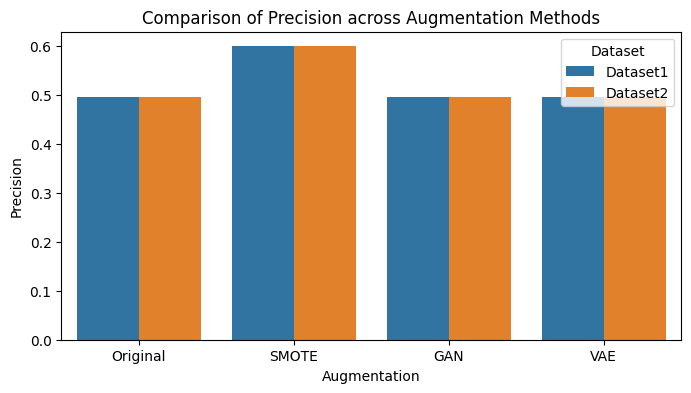

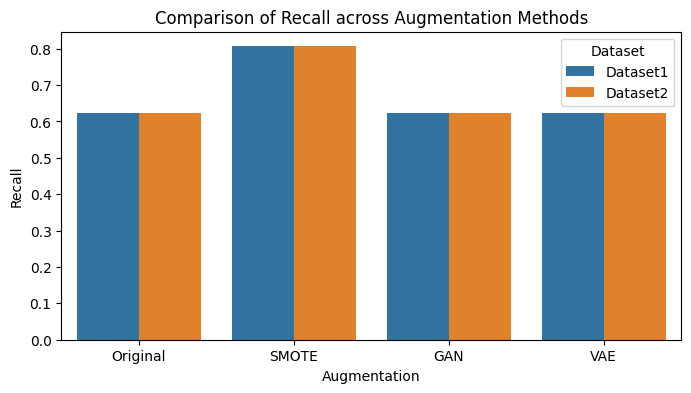

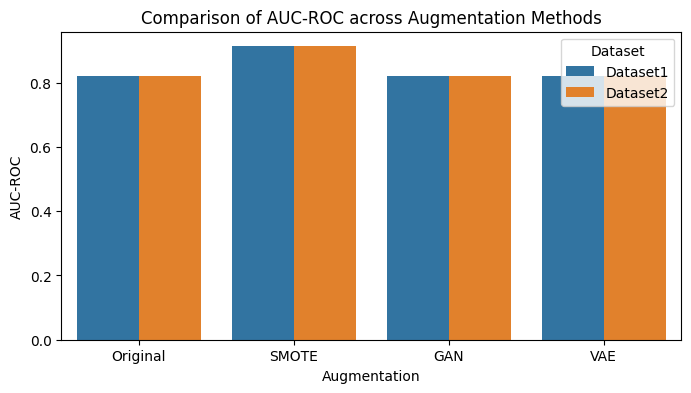

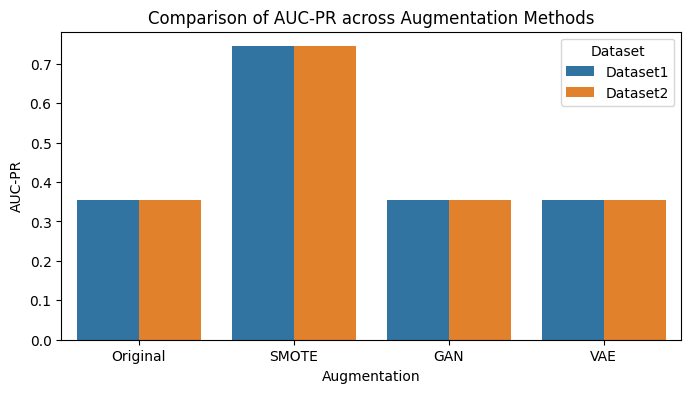

In [13]:
metrics = ['Precision', 'Recall', 'AUC-ROC', 'AUC-PR']
for metric in metrics:
    plt.figure(figsize=(8, 4))
    sns.barplot(data=df_results, x='Augmentation', y=metric, hue='Dataset')
    plt.title(f'Comparison of {metric} across Augmentation Methods')
    plt.ylabel(metric)
    plt.show()